# Lab assignment №1, part 2

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the second part of the assignment. First and third parts are waiting for you in the same directory.*__

## Part 2. Data preprocessing, model training and evaluation.

### 1. Reading the data
Today we work with the [dataset](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Vehicle+Silhouettes%29), describing different cars for multiclass ($k=4$) classification problem. The data is available below.

In [1]:
# If on colab, uncomment the following lines

# ! wget https://raw.githubusercontent.com/girafe-ai/ml-mipt/basic_f20/homeworks_basic/Lab1_ML_pipeline_and_SVM/car_data.csv

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

dataset = pd.read_csv('car_data.csv', delimiter=',', header=None).values
data = dataset[:, :-1].astype(int)
target = dataset[:, -1]

print(data.shape, target.shape)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(846, 19) (846,)
(549, 19) (549,) (297, 19) (297,)


To get some insights about the dataset, `pandas` might be used. The `train` part is transformed to `pd.DataFrame` below.

In [3]:
X_train_pd = pd.DataFrame(X_train)

# First 15 rows of our dataset.
X_train_pd.head(15)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,4,85,44,70,205,103,52,149,45,19,144,241,325,188,127,9,11,180,183
1,268,86,39,60,140,60,7,119,55,17,134,140,212,141,61,7,8,200,207
2,52,98,55,101,228,70,9,210,31,24,168,236,661,245,72,1,6,188,197
3,78,104,52,94,208,66,5,208,31,24,161,227,666,218,76,11,4,193,191
4,415,101,53,108,184,54,12,216,31,24,172,220,685,187,68,4,24,190,201
5,502,86,36,66,128,57,8,131,52,18,127,148,252,139,76,5,27,183,187
6,233,100,52,104,189,59,10,208,32,24,163,220,642,197,70,1,22,187,198
7,744,96,46,88,174,68,10,155,43,19,148,173,354,182,69,14,15,194,202
8,1,91,41,84,141,57,9,149,45,19,143,170,330,158,72,9,14,189,199
9,132,97,42,101,186,59,9,186,36,22,138,208,511,168,67,7,41,194,206


Methods `describe` and `info` deliver some useful information.

In [4]:
X_train_pd.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000
mean,412.180328,93.697632,44.810565,81.701275,168.016393,61.378871,8.462659,168.025501,41.118397,20.519126,147.823315,187.451730,435.568306,174.440801,72.180328,6.723133,12.338798,189.205829,195.816029
std,243.373804,8.131650,6.108254,15.764636,32.428553,6.944146,4.180351,32.960373,7.825574,2.569845,14.299320,30.608011,174.655514,31.716506,7.391446,4.913470,8.919038,6.302262,7.678582
min,0.000000,73.000000,33.000000,42.000000,104.000000,47.000000,2.000000,114.000000,26.000000,17.000000,118.000000,131.000000,191.000000,112.000000,60.000000,0.000000,0.000000,176.000000,181.000000
25%,205.000000,87.000000,40.000000,70.000000,141.000000,57.000000,6.000000,146.000000,34.000000,19.000000,137.000000,167.000000,317.000000,150.000000,67.000000,3.000000,5.000000,184.000000,190.000000
50%,411.000000,93.000000,44.000000,80.000000,167.000000,61.000000,8.000000,157.000000,43.000000,20.000000,146.000000,178.000000,362.000000,174.000000,71.000000,6.000000,11.000000,189.000000,197.000000
75%,615.000000,100.000000,49.000000,96.000000,194.000000,65.000000,10.000000,197.000000,46.000000,23.000000,158.000000,214.000000,578.000000,196.000000,75.000000,10.000000,18.000000,194.000000,201.000000
max,845.000000,119.000000,59.000000,112.000000,252.000000,126.000000,52.000000,265.000000,59.000000,29.000000,188.000000,288.000000,1018.000000,264.000000,127.000000,22.000000,41.000000,204.000000,211.000000


In [5]:
X_train_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       549 non-null    int64
 1   1       549 non-null    int64
 2   2       549 non-null    int64
 3   3       549 non-null    int64
 4   4       549 non-null    int64
 5   5       549 non-null    int64
 6   6       549 non-null    int64
 7   7       549 non-null    int64
 8   8       549 non-null    int64
 9   9       549 non-null    int64
 10  10      549 non-null    int64
 11  11      549 non-null    int64
 12  12      549 non-null    int64
 13  13      549 non-null    int64
 14  14      549 non-null    int64
 15  15      549 non-null    int64
 16  16      549 non-null    int64
 17  17      549 non-null    int64
 18  18      549 non-null    int64
dtypes: int64(19)
memory usage: 81.6 KB


### 2. Machine Learning pipeline
Here you are supposed to perform the desired transformations. Please, explain your results briefly after each task.

#### 2.0. Data preprocessing
* Make some transformations of the dataset (if necessary). Briefly explain the transformations

Нормировка фичей StandartScaler'ом 
Т.к. разные масштабы у значений

In [6]:
# some extra headers
%matplotlib inline
from sklearn import linear_model, preprocessing, model_selection, metrics, decomposition
from sklearn import pipeline
import scikitplot
import matplotlib.pyplot as plt

# setting random state to have reproducable results
random_state = 3

In [7]:
### YOUR CODE HERE
scaler = preprocessing.StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### 2.1. Basic logistic regression
* Find optimal hyperparameters for logistic regression with cross-validation on the `train` data (small grid/random search is enough, no need to find the *best* parameters).

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` `tol=1e-3` and ` max_iter=500`.*

In [8]:
### Задание модели
logregr_classifier = linear_model.LogisticRegression(multi_class="multinomial", solver="saga", tol=1e-3, max_iter=500, random_state=random_state)

In [9]:
### Генерация сетки
print(logregr_classifier.get_params().keys())

parameters_grid = {
    "penalty" : ["l1", "l2"],
    "C" : np.linspace(0.1, 5, num=20)
}

cv = model_selection.StratifiedShuffleSplit(n_splits=20, test_size=0.2, random_state=random_state)
grid_cv = model_selection.GridSearchCV(logregr_classifier, parameters_grid, scoring="accuracy", cv=cv, n_jobs=8)

dict_keys(['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'l1_ratio', 'max_iter', 'multi_class', 'n_jobs', 'penalty', 'random_state', 'solver', 'tol', 'verbose', 'warm_start'])


In [10]:
%time
grid_cv.fit(X_train_scaled, y_train)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 3.1 µs


GridSearchCV(cv=StratifiedShuffleSplit(n_splits=20, random_state=3, test_size=0.2,
            train_size=None),
             error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=500,
                                          multi_class='multinomial',
                                          n_jobs=None, penalty='l2',
                                          random_state=3, solver='saga',
                                          tol=0.001, verbose=0,
                                          warm_st...
             iid='deprecated', n_jobs=8,
             param_grid={'C': array([0.1       , 0.35789474, 0.61578947, 0.87368421, 1.13157895,
       1.38947368, 1.64736842, 1.90526316, 2.16315789, 2.42105263,
       2.67894737, 2.93684211, 3.19473684, 3.452

In [11]:
print(grid_cv.best_params_)
print(grid_cv.best_score_)

logregr_best_params = grid_cv.best_params_
best_classifier = grid_cv.best_estimator_

{'C': 2.421052631578948, 'penalty': 'l1'}
0.8027272727272727


In [12]:
y_pred = best_classifier.predict(X_test_scaled)
print("f1 score: ", metrics.f1_score(y_test, y_pred, average="macro"))
print("accuracy: ", metrics.accuracy_score(y_test, y_pred))

f1 score:  0.7607854423733643
accuracy:  0.7609427609427609


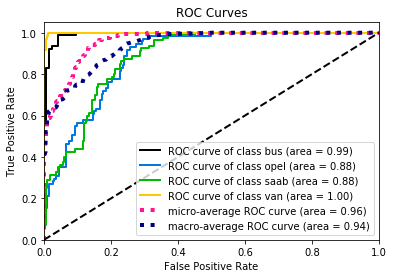

In [13]:
scikitplot.metrics.plot_roc(y_test, best_classifier.predict_proba(X_test_scaled))

In [14]:
# You might use this command to install scikit-plot. 
# Warning, if you a running locally, don't call pip from within jupyter, call it from terminal in the corresponding 
# virtual environment instead

#! pip install scikit-plot

#### 2.2. PCA: explained variance plot
* Apply the PCA to the train part of the data. Build the explaided variance plot. 

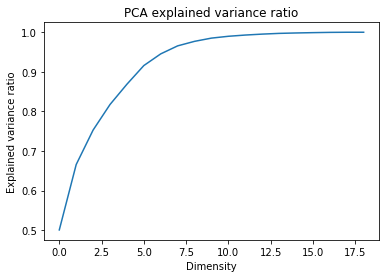

In [15]:
### YOUR CODE HERE
pca = decomposition.PCA()
pca.fit(X_train_scaled)
explained_var_ratio = np.cumsum(pca.explained_variance_ratio_)

plt.plot(explained_var_ratio)
plt.title("PCA explained variance ratio")
plt.xlabel("Dimensity")
plt.ylabel("Explained variance ratio")

plt.show()

#### 2.3. PCA trasformation
* Select the appropriate number of components. Briefly explain your choice. Should you normalize the data?

Answs:
- I've selected apprporiate number of components as fitsr number of components, which explains more than **90%** of variance
- We should normalize data , because variance depends from value scale, and we choosing principal components to maximize variance

*Use `fit` and `transform` methods to transform the `train` and `test` parts.*

In [16]:
### YOUR CODE HERE
n_components = np.argmax(explained_var_ratio > 0.9) + 1
print("{} components explain {} variance".format(n_components, explained_var_ratio[n_components - 1]))

pipe = pipeline.make_pipeline(preprocessing.StandardScaler(), decomposition.PCA(n_components=n_components))
pipe.fit(X_train)

X_train_transf = pipe.transform(X_train)
X_test_transf = pipe.transform(X_test)

6 components explain 0.915821894440236 variance


**Note: From this point `sklearn` [Pipeline](https://scikit-learn.org/stable/modules/compose.html) might be useful to perform transformations on the data. Refer to the [docs](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) for more information.**

#### 2.4. Logistic regression on PCA-preprocessed data.
* Find optimal hyperparameters for logistic regression with cross-validation on the transformed by PCA `train` data.

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` and `tol=1e-3`*

In [17]:
### YOUR CODE HERE
%time
grid_cv.estimator.max_iter = 1000
grid_cv.fit(X_train_transf, y_train)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 4.53 µs


GridSearchCV(cv=StratifiedShuffleSplit(n_splits=20, random_state=3, test_size=0.2,
            train_size=None),
             error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=1000,
                                          multi_class='multinomial',
                                          n_jobs=None, penalty='l2',
                                          random_state=3, solver='saga',
                                          tol=0.001, verbose=0,
                                          warm_s...
             iid='deprecated', n_jobs=8,
             param_grid={'C': array([0.1       , 0.35789474, 0.61578947, 0.87368421, 1.13157895,
       1.38947368, 1.64736842, 1.90526316, 2.16315789, 2.42105263,
       2.67894737, 2.93684211, 3.19473684, 3.452

In [18]:
print(grid_cv.best_params_)
print(grid_cv.best_score_)

best_classifier = grid_cv.best_estimator_

{'C': 0.1, 'penalty': 'l1'}
0.47727272727272724


In [19]:
y_pred = best_classifier.predict(X_test_transf)
print("f1 score: ", metrics.f1_score(y_test, y_pred, average="macro"))
print("accuracy: ", metrics.accuracy_score(y_test, y_pred))

f1 score:  0.44649060637922267
accuracy:  0.4478114478114478


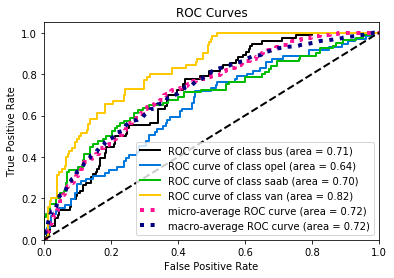

In [20]:
scikitplot.metrics.plot_roc(y_test, best_classifier.predict_proba(X_test_transf))

#### 2.5. Decision tree
* Now train a desicion tree on the same data. Find optimal tree depth (`max_depth`) using cross-validation.

* Measure the model quality using the same metrics you used above.

In [21]:
from sklearn.tree import DecisionTreeClassifier

In [22]:
tree_classifier = DecisionTreeClassifier(random_state=random_state)
print(tree_classifier.get_params().keys())

parameters_grid = { "max_depth" : np.arange(1, 25) }

cv = model_selection.StratifiedShuffleSplit(n_splits=20, test_size=0.2, random_state=random_state)
grid_cv = model_selection.GridSearchCV(tree_classifier, parameters_grid, scoring="accuracy", cv=cv, n_jobs=8) 

dict_keys(['ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'presort', 'random_state', 'splitter'])


In [23]:
%time
grid_cv.fit(X_train_scaled, y_train)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 4.77 µs


GridSearchCV(cv=StratifiedShuffleSplit(n_splits=20, random_state=3, test_size=0.2,
            train_size=None),
             error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=3, splitter='best'),
             iid='deprecated', n_jobs=8,
             param_grid

In [24]:
print(grid_cv.best_params_)
print(grid_cv.best_score_)

tree_best_params = grid_cv.best_params_
best_classifier = grid_cv.best_estimator_

{'max_depth': 9}
0.6618181818181819


In [25]:
y_pred = best_classifier.predict(X_test_scaled)
print("f1 score: ", metrics.f1_score(y_test, y_pred, average="macro"))
print("accuracy: ", metrics.accuracy_score(y_test, y_pred))

f1 score:  0.7237781766997818
accuracy:  0.7205387205387206


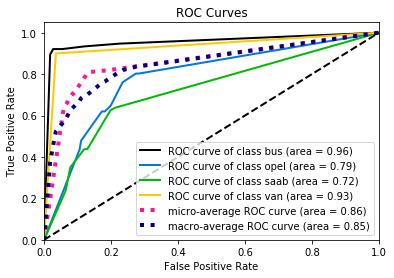

In [26]:
scikitplot.metrics.plot_roc(y_test, best_classifier.predict_proba(X_test_scaled))

#### 2.6. Bagging.
Here starts the ensembling part.

First we will use the __Bagging__ approach. Build an ensemble of $N$ algorithms varying N from $N_{min}=2$ to $N_{max}=100$ (with step 5).

We will build two ensembles: of logistic regressions and of decision trees.

*Comment: each ensemble should be constructed from models of the same family, so logistic regressions should not be mixed up with decision trees.*


*Hint 1: To build a __Bagging__ ensebmle varying the ensemble size efficiently you might generate $N_{max}$ subsets of `train` data (of the same size as the original dataset) using bootstrap procedure once. Then you train a new instance of logistic regression/decision tree with optimal hyperparameters you estimated before on each subset (so you train it from scratch). Finally, to get an ensemble of $N$ models you average the $N$ out of $N_{max}$ models predictions.*

*Hint 2: sklearn might help you with this taks. Some appropriate function/class might be out there.*

* Plot `f1` and `accuracy` scores plots w.r.t. the size of the ensemble.

* Briefly analyse the plot. What is the optimal number of algorithms? Explain your answer.

* How do you think, are the hyperparameters for the decision trees you found in 2.5 optimal for trees used in ensemble? 

Answs:
- 37 is optimal estimators number for logistic regressions ensemble. We can see that with grow of estimators numbers score decrease and even worse than single model. That happens because of high correlation of log. regr. models
- 52 is optimal estimators number fot trees ensemble.
- No, it isn't optimal, because with standalone tree it is better to use not deep model, while in bagging vice versa: better to use deep trees

In [27]:
# YOUR CODE HERE
from sklearn.ensemble import BaggingClassifier

logregr_classifier = linear_model.LogisticRegression(multi_class="multinomial", solver="saga",
                                                     C=logregr_best_params["C"], penalty=logregr_best_params["penalty"],
                                                     max_iter=500, random_state=random_state)
tree_classifier = DecisionTreeClassifier(max_depth=tree_best_params["max_depth"], random_state=random_state)

In [28]:
N = np.arange(2, 101, 5)

def RunExperiment(bagging_classifiers):
    assert(len(bagging_classifiers) == len(N))
    
    for i in range(len(N)):
        bagging_classifiers[i].fit(X_train_scaled, y_train)
    
    f1 = np.array([metrics.f1_score(bagging_classifiers[i].predict(X_test_scaled), y_test, average="macro") for i in range(len(N))])
    accuracy = np.array([metrics.accuracy_score(bagging_classifiers[i].predict(X_test_scaled), y_test) for i in range(len(N))]) 
        
    plt.plot(N, f1)
    plt.xlabel("Number of basic estimators")
    plt.ylabel("f1 score")
    plt.show()
    
    print("best number of models for f1 score: ", N[np.argmax(f1)], " f1: ", np.max(f1))
    
    plt.plot(N, accuracy)
    plt.xlabel("Number of basic estimators")
    plt.ylabel("accuracy score")
    plt.show()
    
    print("best number of models for accuracy score: ", N[np.argmax(accuracy)], " accuracy: ", np.max(accuracy))

for logistic regression


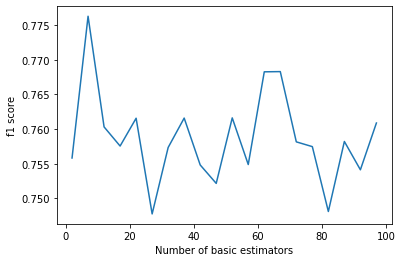

best number of models for f1 score:  7  f1:  0.7762923074497723


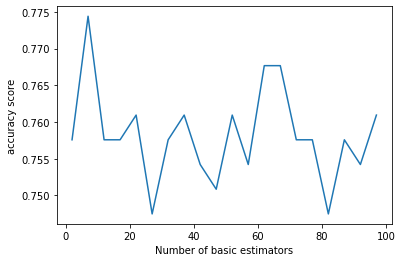

best number of models for accuracy score:  7  accuracy:  0.7744107744107744


In [29]:
import warnings; warnings.filterwarnings(action='ignore')

print("for logistic regression")
bagging_logregr_classifiers = np.array([BaggingClassifier(base_estimator=logregr_classifier, n_estimators=i,
                                                          bootstrap=True, n_jobs=8)
                                        for i in N])
RunExperiment(bagging_logregr_classifiers)

for decision trees


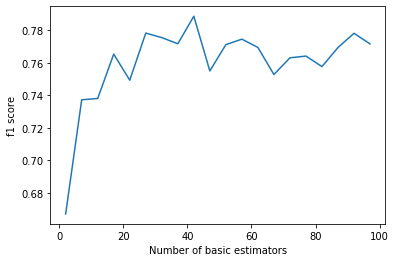

best number of models for f1 score:  42  f1:  0.7886446991145384


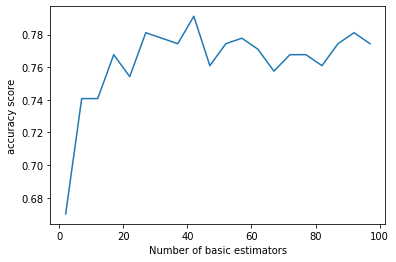

best number of models for accuracy score:  42  accuracy:  0.7912457912457912


In [30]:
import warnings; warnings.filterwarnings(action='ignore')

print("for decision trees")
bagging_tree_classifiers = np.array([BaggingClassifier(base_estimator=tree_classifier, n_estimators=i,
                                                       bootstrap=True, n_jobs=8)
                                        for i in N])
RunExperiment(bagging_tree_classifiers)

#### 2.7. Random Forest
Now we will work with the Random Forest (its `sklearn` implementation).

* Plot `f1` and `accuracy` scores plots w.r.t. the number of trees in Random Forest.

* What is the optimal number of trees you've got? Is it different from the optimal number of logistic regressions/decision trees in 2.6? Explain the results briefly.

Answs:

- 92 is optimal estimators number for random forest ensemble. It's greater than bagging optimal numbers, because in random forest we get less correlated models

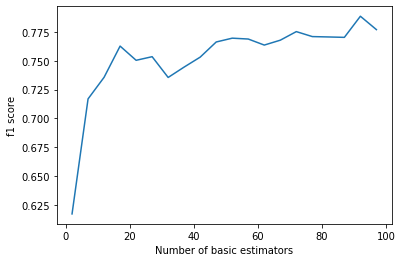

best number of models for f1 score:  92  f1:  0.7887480179526459


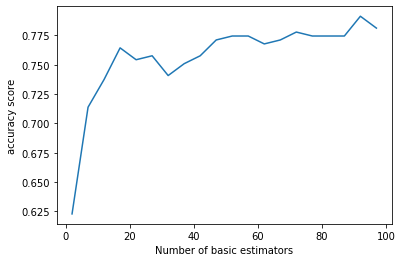

best number of models for accuracy score:  92  accuracy:  0.7912457912457912


In [31]:
from sklearn.ensemble import RandomForestClassifier

rf = np.array([RandomForestClassifier(n_estimators=i, bootstrap=True, n_jobs=8, random_state=random_state)
                                        for i in N])
RunExperiment(rf)

#### 2.8. Learning curve
Your goal is to estimate, how does the model behaviour change with the increase of the `train` dataset size.

* Split the training data into 10 equal (almost) parts. Then train the models from above (Logistic regression, Desicion Tree, Random Forest) with optimal hyperparameters you have selected on 1 part, 2 parts (combined, so the train size in increased by 2 times), 3 parts and so on.

* Build a plot of `accuracy` and `f1` scores on `test` part, varying the `train` dataset size (so the axes will be score - dataset size.

* Analyse the final plot. Can you make any conlusions using it? 

Answs:

- Logistic regression shows best scores on each X_train subset except full X_train set. On X_train Random Forest shows better scores. Because with growth of train dataset size , because errors of models from a random forest ensemble become more independent -> the total error becomes less
- Decision tree shows worst result, because of its simplicity 

In [32]:
logregr_classifier = linear_model.LogisticRegression(multi_class="multinomial", solver="saga",
                                                     C=logregr_best_params["C"], penalty=logregr_best_params["penalty"],
                                                     max_iter=500, random_state=random_state)
tree_classifier = DecisionTreeClassifier(max_depth=tree_best_params["max_depth"], random_state=random_state)
rf_classifier = RandomForestClassifier(n_estimators=92, bootstrap=True, n_jobs=8, random_state=random_state)

In [33]:
X_batches = np.array(np.array_split(X_train_scaled, 10))
y_batches = np.array(np.array_split(y_train, 10))
train_sizes = np.cumsum(list(map(lambda x: x.shape[0], X_batches)))

print(train_sizes)

def RunExperiment2(classifier):
    f1_scores = []
    accuracy_scores = []
    
    X_train = X_batches[0]
    y_train = y_batches[0]
    
    for i in range(len(X_batches)):
        classifier.fit(X_train, y_train)
        f1_scores.append(metrics.f1_score(classifier.predict(X_test_scaled), y_test, average="macro"))
        accuracy_scores.append(metrics.accuracy_score(classifier.predict(X_test_scaled), y_test))
        
        if i != len(X_batches) - 1:
            X_train = np.vstack((X_train, X_batches[i+1]))
            y_train = np.hstack((y_train, y_batches[i+1]))
    
    return (f1_scores, accuracy_scores)

[ 55 110 165 220 275 330 385 440 495 549]


In [34]:
scores = {
    "Log Regr" : RunExperiment2(logregr_classifier),
    "Decision Tree" : RunExperiment2(tree_classifier),
    "Random Forest" : RunExperiment2(rf_classifier)
}

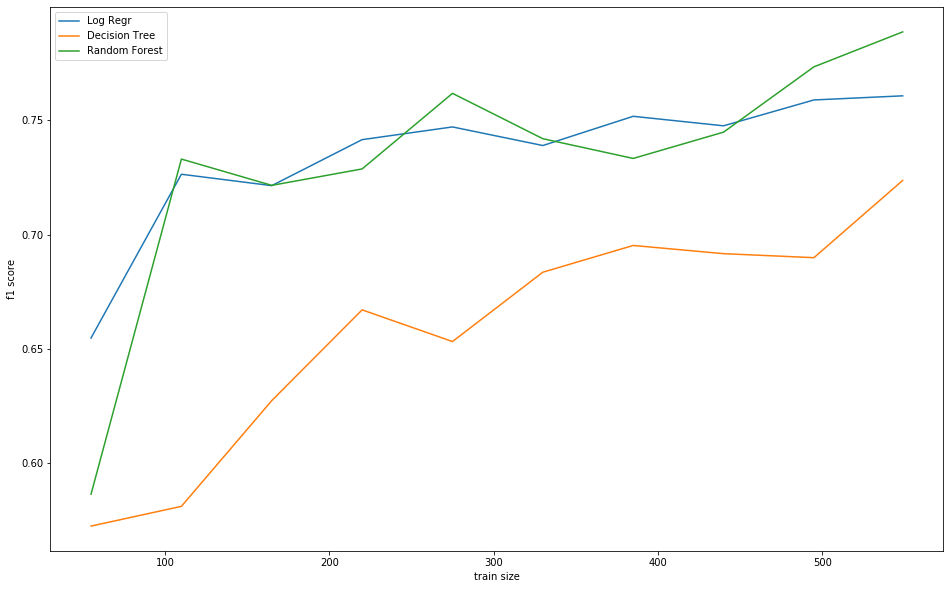

In [35]:
plt.figure(figsize=(16,10))

# plot f1 values
plt.plot(train_sizes, scores["Log Regr"][0], train_sizes, scores["Decision Tree"][0], train_sizes, scores["Random Forest"][0])
plt.ylabel("f1 score")
plt.xlabel("train size")
plt.legend(scores.keys())
plt.show()

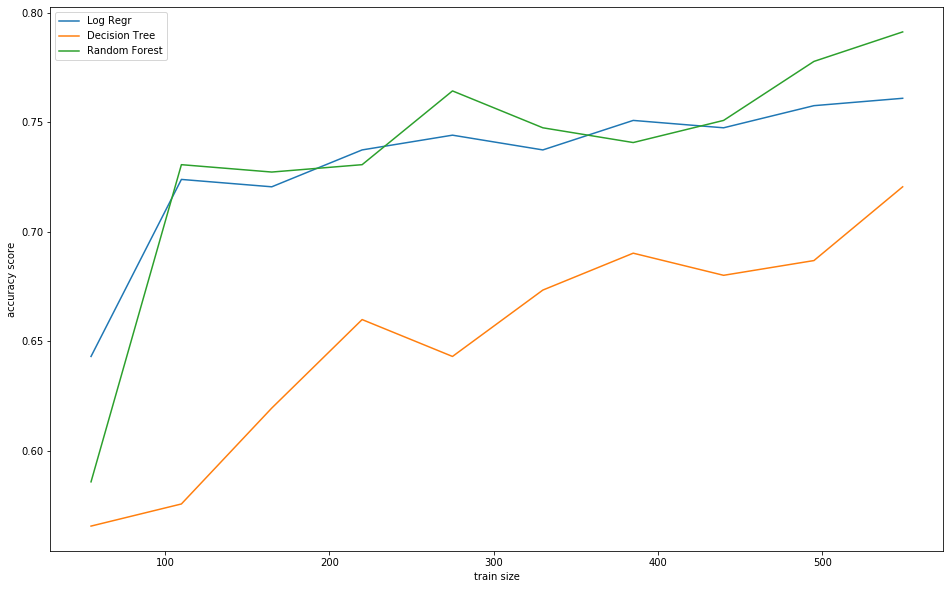

In [36]:
plt.figure(figsize=(16,10))

# plot accuracy values
plt.plot(train_sizes, scores["Log Regr"][1], train_sizes, scores["Decision Tree"][1], train_sizes, scores["Random Forest"][1])
plt.ylabel("accuracy score")
plt.xlabel("train size")
plt.legend(scores.keys())
plt.show()